<a href="https://colab.research.google.com/github/sidO3/reimagined_public/blob/main/MIS779_MAIN_FILE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### COMBINING THE THREE DATA FRAME TO ONE UNING UNIQUE IDENTIFIER DONOR KEY

In [ ]:
import pandas as pd

# Function to load and explore data
def explore_data(donation_path, donor_path, interaction_path):
    # Load data from files
    donation_df = pd.read_excel(donation_path)
    donor_df = pd.read_excel(donor_path)
    interaction_df = pd.read_csv(interaction_path)

    # Basic exploration of each dataframe
    print("Donation & Pledge Data:")
    print(donation_df.head())
    print("\nDonor Data:")
    print(donor_df.head())
    print("\nInteraction Data:")
    print(interaction_df.head())

    # Merge dataframes based on Donor Key
    merged_df = pd.merge(donor_df, donation_df, on='Unique Identifier', how='left')
    merged_df = pd.merge(merged_df, interaction_df, on='Unique Identifier', how='left')

    # Basic exploration of merged dataframe
    print("\nMerged Data:")
    print(merged_df.head())
    print("\nMerged Data Info:")
    print(merged_df.info())

    # Save a copy of the merged file in the location of the input files
    merged_file_path = donor_path.replace("Donor Data II.xlsx", "Merged_Data.csv")
    merged_df.to_csv(merged_file_path, index=False)
    print("\nMerged file saved at:", merged_file_path)

# Input file paths
donation_path = "/content/drive/MyDrive/MIS779 DATA/Donation & Pledge Data II.xlsx"
donor_path = "/content/drive/MyDrive/MIS779 DATA/Donor Data II.xlsx"
interaction_path = "/content/drive/MyDrive/MIS779 DATA/Interaction_Data.csv"

# Call function to explore data
explore_data(donation_path, donor_path, interaction_path)



<ipython-input-15-19faefda2547>:8: DtypeWarning: Columns (0,3) have mixed types. Specify dtype option on import or set low_memory=False.
  interaction_df = pd.read_csv(interaction_path)


Donation & Pledge Data:
   DMRT_Commitment_Key     CommitmentType  Unique Identifier  \
0            1222495.1  Ongoing Financial            1915694   
1            1222516.1  Ongoing Financial            4615694   
2            1222501.1  Ongoing Financial            6615694   
3            1222499.1  Ongoing Financial            8615694   
4            1222511.1  Ongoing Financial            9615694   

  ProductTemplateCode producttemplatedescription    ProductCategory  \
0       CHOSEN PLEDGE   Child Sponsorship Pledge      CHOSEN PLEDGE   
1               CSPON             Sponsorship of  Child Sponsorship   
2               CSPON             Sponsorship of  Child Sponsorship   
3               CSPON             Sponsorship of  Child Sponsorship   
4               CSPON             Sponsorship of  Child Sponsorship   

             ClassType FulfilmentDate FulfilmentEndedDate  Days Donated  \
0            WVTPledge     2021-03-21          2021-04-19          29.0   
1  WVTChildSpo

### DOING BASIC DEMOGRAPHIC ANALYSIS ON MERGET DATAFRAME

<ipython-input-16-34fd1921be9e>:40: DtypeWarning: Columns (0,3) have mixed types. Specify dtype option on import or set low_memory=False.
  interaction_df = pd.read_csv(interaction_path)



--- Demographic Analysis based on Age ---
Mean Age: 38.89000483964135
Median Age: 35.0
Maximum Age: 153.0
Minimum Age: 0.0

--- Demographic Analysis based on Gender ---
Gender Counts:
Female    17471
Male      11459
Name: gender, dtype: int64


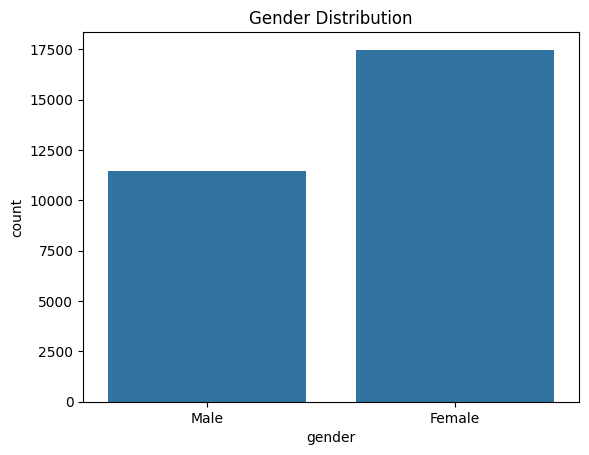


--- Demographic Analysis based on Generation ---
Generation Counts:
10 - Unknown                        333149
07 - Generation Y (1977-1994)        84272
08 - Generation Z (1995-2012)        54378
06 - Generation X (1966-1976)        26858
05 - Boomers II (1955-1965)          13979
04 - Boomers I (1946-1954)            8261
03 - Post-War Cohort (1928-1945)      3683
09 - Generation ? (2013+)              723
02 - World War II (1922-1927)            7
Name: Generation, dtype: int64


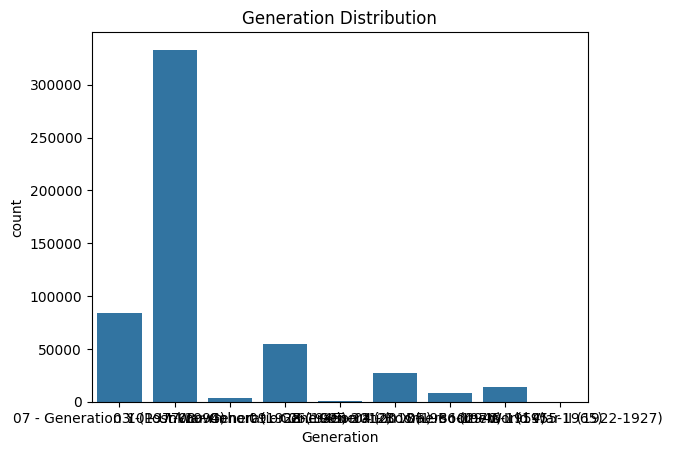

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to perform demographic analysis
def demographic_analysis(merged_df):
    # Demographic analysis based on age
    print("\n--- Demographic Analysis based on Age ---")
    print("Mean Age:", merged_df['Age'].mean())
    print("Median Age:", merged_df['Age'].median())
    print("Maximum Age:", merged_df['Age'].max())
    print("Minimum Age:", merged_df['Age'].min())

    # Demographic analysis based on gender
    print("\n--- Demographic Analysis based on Gender ---")
    gender_counts = merged_df['gender'].value_counts()
    print("Gender Counts:")
    print(gender_counts)
    sns.countplot(data=merged_df, x='gender')
    plt.title('Gender Distribution')
    plt.show()

    # Demographic analysis based on generation
    print("\n--- Demographic Analysis based on Generation ---")
    generation_counts = merged_df['Generation'].value_counts()
    print("Generation Counts:")
    print(generation_counts)
    sns.countplot(data=merged_df, x='Generation')
    plt.title('Generation Distribution')
    plt.show()

# Input file paths
donation_path = "/content/drive/MyDrive/MIS779 DATA/Donation & Pledge Data II.xlsx"
donor_path = "/content/drive/MyDrive/MIS779 DATA/Donor Data II.xlsx"
interaction_path = "/content/drive/MyDrive/MIS779 DATA/Interaction_Data.csv"

# Load merged data
donation_df = pd.read_excel(donation_path)
donor_df = pd.read_excel(donor_path)
interaction_df = pd.read_csv(interaction_path)

# Merge dataframes based on Donor Key
merged_df = pd.merge(donor_df, donation_df, on='Unique Identifier', how='left')
merged_df = pd.merge(merged_df, interaction_df, on='Unique Identifier', how='left')

# Perform demographic analysis
demographic_analysis(merged_df)


### SOME COMPLEX DEMOGRAPHICAL ANALYSIS


--- Donation Average by Age Group and Gender ---
   Age  gender    TotalPaid
0  0.0  Female   480.000000
1  2.0  Female   844.000000
2  3.0  Female   197.134328
3  3.0    Male  1200.000000
4  5.0  Female   145.173913


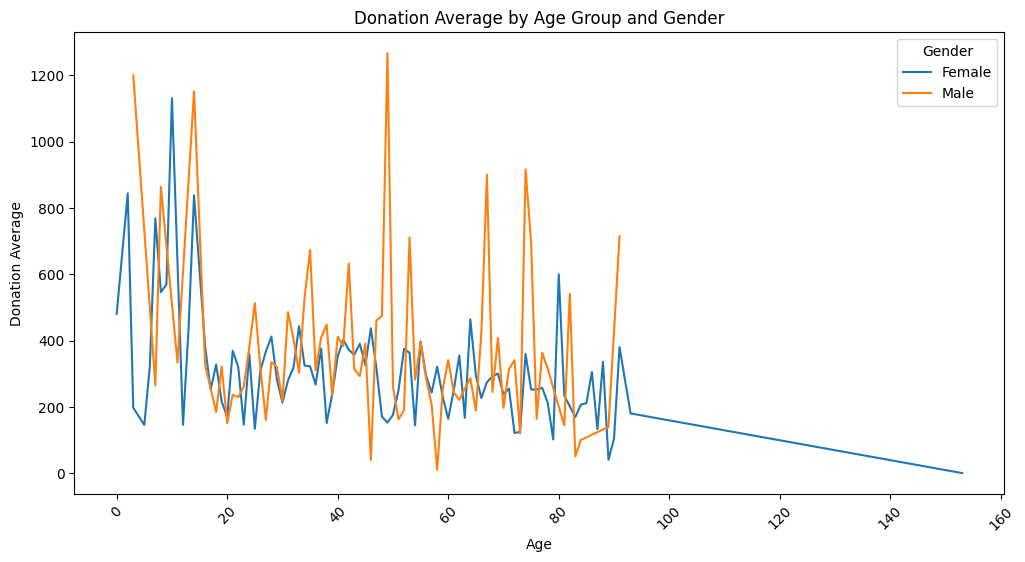


--- Age Group and Gender with the Most Repeat Donations ---
     Age  gender  Count
31  23.0  Female    735


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to perform complex demographic analysis
def complex_demographic_analysis(merged_df):
    # Calculate donation average by age group and gender
    donation_avg_by_age_gender = merged_df.groupby(['Age', 'gender'])['TotalPaid'].mean().reset_index()
    print("\n--- Donation Average by Age Group and Gender ---")
    print(donation_avg_by_age_gender.head())

    # Visualize donation average by age group and gender
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=donation_avg_by_age_gender, x='Age', y='TotalPaid', hue='gender')
    plt.title('Donation Average by Age Group and Gender')
    plt.xlabel('Age')
    plt.ylabel('Donation Average')
    plt.xticks(rotation=45)
    plt.legend(title='Gender')
    plt.show()

    # Identify age group and gender with the most repeat donations
    repeat_donations = merged_df.groupby(['Age', 'gender']).size().reset_index(name='Count')
    most_repeats = repeat_donations[repeat_donations['Count'] == repeat_donations['Count'].max()]
    print("\n--- Age Group and Gender with the Most Repeat Donations ---")
    print(most_repeats)

# Perform complex demographic analysis
complex_demographic_analysis(merged_df)


### MORE COMPLEX DEMOGRAPHICAL ANALYSIS -

Divide the dataframe based on generations and find which generation has the
highest average donation, then display a graph.

Divide the dataframe to find the average donation based on generation and genders.

Divide the dataframe to see all the generations and genders where repeat donations are happening.

Develop a favorable profile most likely to donate based on the above results.



--- Donation Average by Generation ---
                         Generation   TotalPaid
0     02 - World War II (1922-1927)  711.333333
1  03 - Post-War Cohort (1928-1945)  345.218984
2        04 - Boomers I (1946-1954)  297.541093
3       05 - Boomers II (1955-1965)  354.365564
4     06 - Generation X (1966-1976)  350.896306
5     07 - Generation Y (1977-1994)  338.782200
6     08 - Generation Z (1995-2012)  284.739522
7         09 - Generation ? (2013+)  444.493741
8                      10 - Unknown  384.103928


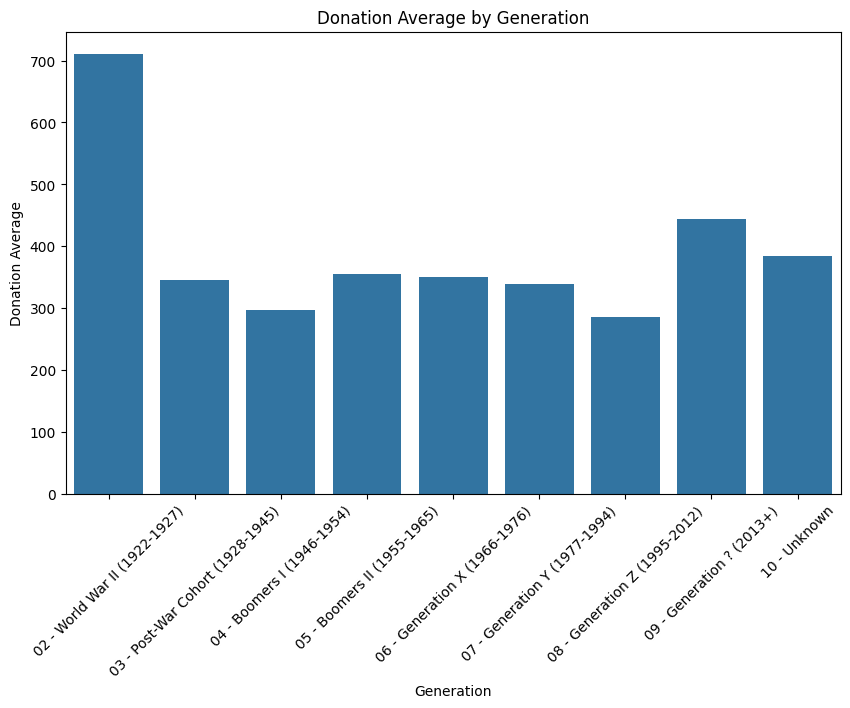


--- Donation Average by Generation and Gender ---
                          Generation  gender    TotalPaid
0      02 - World War II (1922-1927)  Female          NaN
1   03 - Post-War Cohort (1928-1945)  Female   252.199601
2   03 - Post-War Cohort (1928-1945)    Male   334.490196
3         04 - Boomers I (1946-1954)  Female   267.315333
4         04 - Boomers I (1946-1954)    Male   417.662125
5        05 - Boomers II (1955-1965)  Female   269.202668
6        05 - Boomers II (1955-1965)    Male   369.483528
7      06 - Generation X (1966-1976)  Female   291.133253
8      06 - Generation X (1966-1976)    Male   478.398263
9      07 - Generation Y (1977-1994)  Female   308.460030
10     07 - Generation Y (1977-1994)    Male   374.948098
11     08 - Generation Z (1995-2012)  Female   277.782018
12     08 - Generation Z (1995-2012)    Male   281.378936
13         09 - Generation ? (2013+)  Female   471.474255
14         09 - Generation ? (2013+)    Male   709.333333
15                   

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to perform complex demographic analysis
def complex_demographic_analysis(merged_df):
    # 1) Calculate donation average by generation
    donation_avg_by_generation = merged_df.groupby('Generation')['TotalPaid'].mean().reset_index()
    print("\n--- Donation Average by Generation ---")
    print(donation_avg_by_generation)

    # Visualize donation average by generation
    plt.figure(figsize=(10, 6))
    sns.barplot(data=donation_avg_by_generation, x='Generation', y='TotalPaid')
    plt.title('Donation Average by Generation')
    plt.xlabel('Generation')
    plt.ylabel('Donation Average')
    plt.xticks(rotation=45)
    plt.show()

    # 2) Calculate donation average by generation and gender
    donation_avg_by_generation_gender = merged_df.groupby(['Generation', 'gender'])['TotalPaid'].mean().reset_index()
    print("\n--- Donation Average by Generation and Gender ---")
    print(donation_avg_by_generation_gender)

    # 3) Identify generations and genders where repeat donations are happening
    repeat_donations = merged_df.groupby(['Generation', 'gender']).size().reset_index(name='Count')
    repeat_donations = repeat_donations[repeat_donations['Count'] > 1]
    print("\n--- Generations and Genders with Repeat Donations ---")
    print(repeat_donations)


# Perform complex demographic analysis
complex_demographic_analysis(merged_df)


### CAMPAIGN ANALYSIS - FROM INTRACTION DATA

<ipython-input-17-8d94d1185a64>:6: DtypeWarning: Columns (0,3) have mixed types. Specify dtype option on import or set low_memory=False.
  interaction_data = pd.read_csv(file_path)


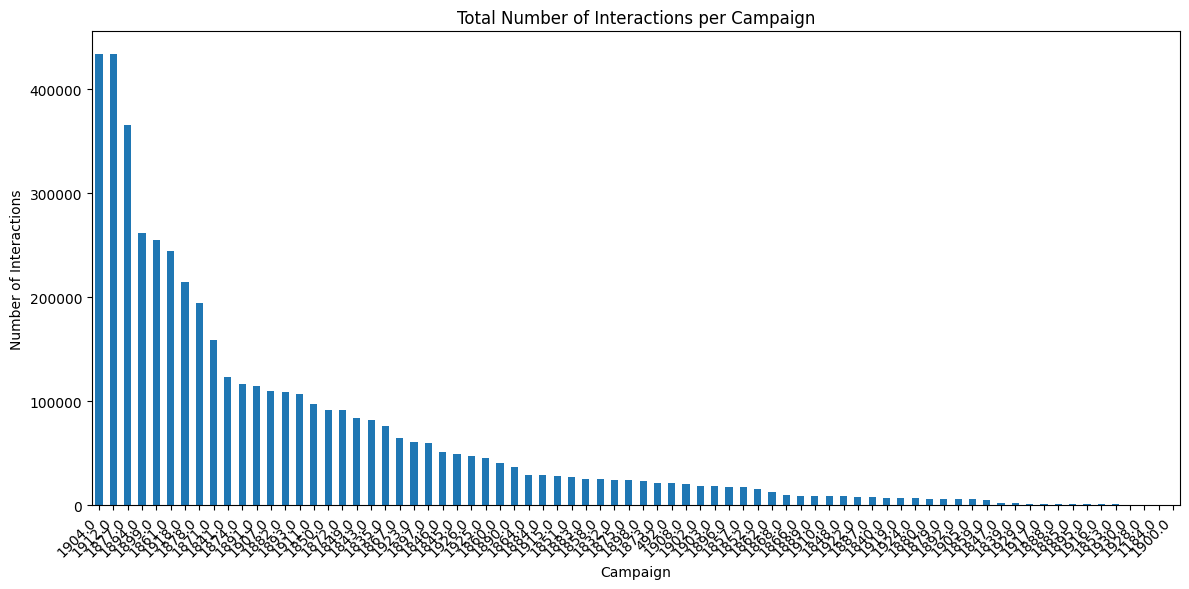

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the interaction data
file_path = "/content/drive/MyDrive/MIS779 DATA/Interaction_Data.csv"
interaction_data = pd.read_csv(file_path)

# Calculate total interactions per campaign
interaction_counts = interaction_data['Campaign_Key'].value_counts()

# Plot the total number of interactions per campaign with adjusted x-axis spacing
plt.figure(figsize=(12, 6))
interaction_counts.plot(kind='bar')
plt.title('Total Number of Interactions per Campaign')
plt.xlabel('Campaign')
plt.ylabel('Number of Interactions')

# Adjust x-axis rotation and alignment for readability
plt.xticks(rotation=45, ha='right')
plt.subplots_adjust(bottom=0.25)  # Increase bottom spacing
plt.tight_layout()  # Automatically adjust subplot parameters to give specified padding
plt.show()


<ipython-input-2-dad57c2a0a32>:5: DtypeWarning: Columns (0,3) have mixed types. Specify dtype option on import or set low_memory=False.
  interaction_data = pd.read_csv("/content/drive/MyDrive/MIS779 DATA/Interaction_Data.csv")


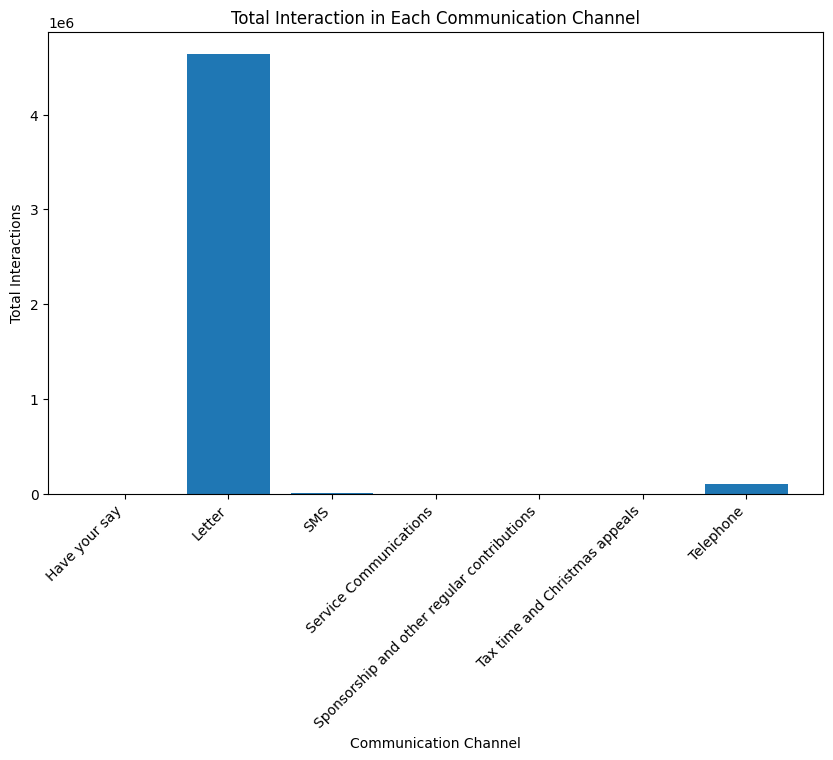

<ipython-input-2-dad57c2a0a32>:21: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  interaction_data['Event_Date'] = pd.to_datetime(interaction_data['Event_Date'], errors='coerce', infer_datetime_format=True)


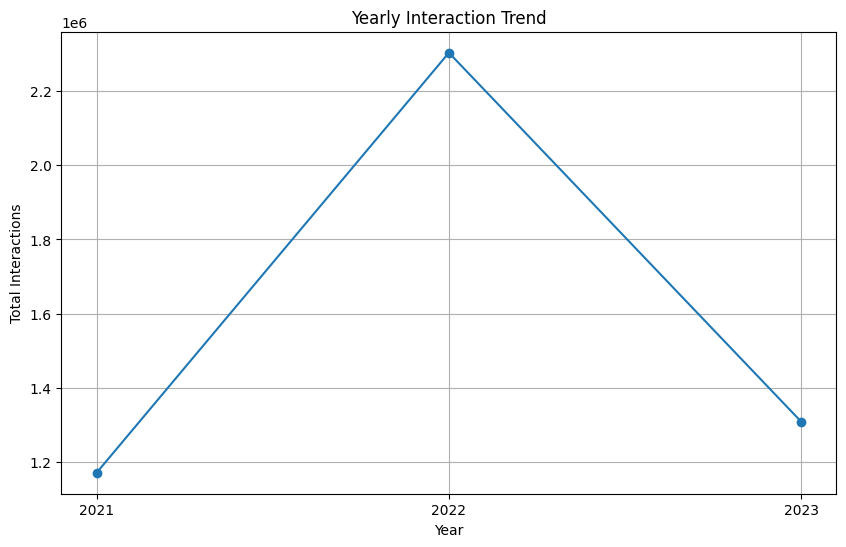

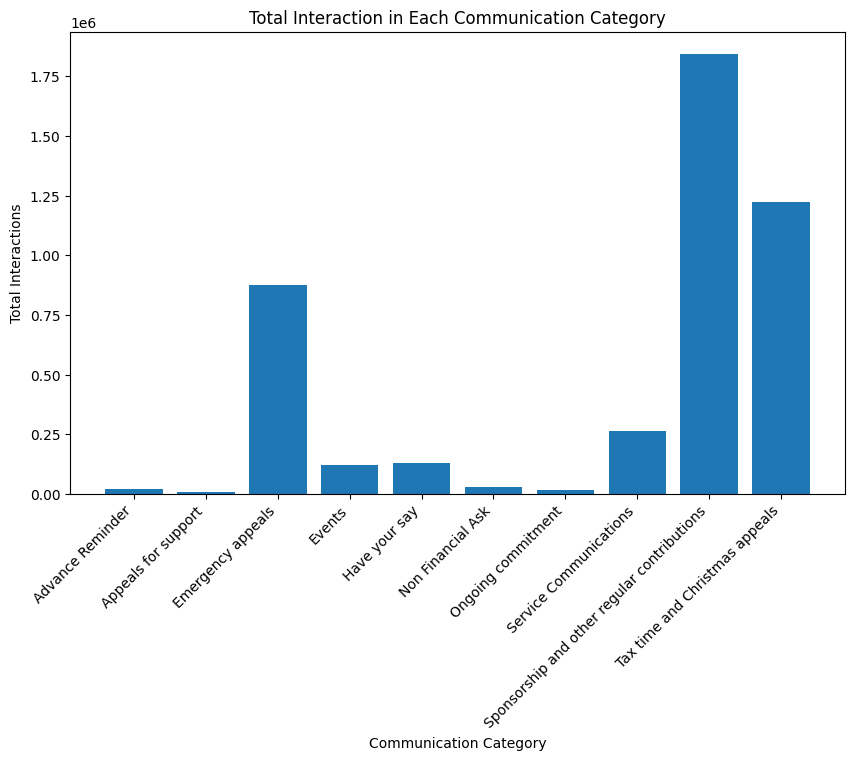

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the interaction data from the CSV file
interaction_data = pd.read_csv("/content/drive/MyDrive/MIS779 DATA/Interaction_Data.csv")

# 1) Total interaction in each communication channel
total_interaction_channel = interaction_data.groupby('CommunicationMediumName').size().reset_index(name='TotalInteractions')

# Plotting total interaction in each communication channel
plt.figure(figsize=(10, 6))
plt.bar(total_interaction_channel['CommunicationMediumName'], total_interaction_channel['TotalInteractions'])
plt.title('Total Interaction in Each Communication Channel')
plt.xlabel('Communication Channel')
plt.ylabel('Total Interactions')
plt.xticks(rotation=45, ha='right')
plt.show()

# 2) Yearly interaction trend
# Convert 'Event_Date' to datetime format
interaction_data['Event_Date'] = pd.to_datetime(interaction_data['Event_Date'], errors='coerce', infer_datetime_format=True)
# Drop rows with missing or incorrect dates
interaction_data = interaction_data.dropna(subset=['Event_Date'])
# Extract year from 'Event_Date'
interaction_data['Year'] = interaction_data['Event_Date'].dt.year
yearly_interaction_trend = interaction_data.groupby('Year').size().reset_index(name='TotalInteractions')

# Plotting yearly interaction trend
plt.figure(figsize=(10, 6))
plt.plot(yearly_interaction_trend['Year'], yearly_interaction_trend['TotalInteractions'], marker='o')
plt.title('Yearly Interaction Trend')
plt.xlabel('Year')
plt.ylabel('Total Interactions')
plt.xticks(yearly_interaction_trend['Year'])
plt.grid(True)
plt.show()

# 3) Total interaction in each communication category
total_interaction_category = interaction_data.groupby('OutboundCommunicationCategoryDescription').size().reset_index(name='TotalInteractions')

# Plotting total interaction in each communication category
plt.figure(figsize=(10, 6))
plt.bar(total_interaction_category['OutboundCommunicationCategoryDescription'], total_interaction_category['TotalInteractions'])
plt.title('Total Interaction in Each Communication Category')
plt.xlabel('Communication Category')
plt.ylabel('Total Interactions')
plt.xticks(rotation=45, ha='right')
plt.show()


### CAMPAIGN ANALYSIS - DEMOGRAPHIC AND DONATIONS

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the merged data from the CSV file
merged_data = pd.read_csv("/content/drive/MyDrive/MIS779 DATA/Merged_Data.csv")

# 1) Which campaign resulted in the maximum number of repeat donors
repeat_donors_data = merged_data[merged_data['CommitmentType'] == 'ongoing']
if not repeat_donors_data.empty:
    max_repeat_donors_campaign = repeat_donors_data['Campaign_Key'].value_counts().idxmax()
    print("Campaign resulting in the maximum number of repeat donors:", max_repeat_donors_campaign)
else:
    print("There are no ongoing commitments (repeat donors) in the dataset.")

# 2) Which campaign resulted in the maximum average of total donations
max_avg_donations_campaign = merged_data.groupby('Campaign_Key')['TotalPaid'].mean().idxmax()

print("Campaign resulting in the maximum average of total donations:", max_avg_donations_campaign)

# 3) Which campaign (top 5) attracted maximum numbers of donors from each generation
top5_generation_campaigns = merged_data.groupby(['Generation', 'Campaign_Key']).size().groupby('Generation').nlargest(5).reset_index(level=0, drop=True)

print("\nTop 5 campaigns attracting maximum numbers of donors from each generation:")
print(top5_generation_campaigns)

# 4) Which campaigns (top 5) attracted maximum number of donors in each gender
top5_gender_campaigns = merged_data.groupby(['gender', 'Campaign_Key']).size().groupby('gender').nlargest(5).reset_index(level=0, drop=True)

print("\nTop 5 campaigns attracting maximum number of donors in each gender:")
print(top5_gender_campaigns)

# 5) Top 3 campaigns for each product category
top3_product_category_campaigns = merged_data.groupby(['ProductCategory', 'Campaign_Key']).size().groupby('ProductCategory').nlargest(3).reset_index(level=0, drop=True)

print("\nTop 3 campaigns for each product category:")
print(top3_product_category_campaigns)

# 6) Top 5 campaigns for each commitment type
top5_commitment_type_campaigns = merged_data.groupby(['CommitmentType', 'Campaign_Key']).size().groupby('CommitmentType').nlargest(5).reset_index(level=0, drop=True)

print("\nTop 5 campaigns for each commitment type:")
print(top5_commitment_type_campaigns)


<ipython-input-6-93b40a8ea4df>:5: DtypeWarning: Columns (5,18) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_data = pd.read_csv("/content/drive/MyDrive/MIS779 DATA/Merged_Data.csv")


There are no ongoing commitments (repeat donors) in the dataset.
Campaign resulting in the maximum average of total donations: 1866.0

Top 5 campaigns attracting maximum numbers of donors from each generation:
Generation                        Campaign_Key
02 - World War II (1922-1927)     1849.0              1
                                  1907.0              1
                                  1925.0              1
                                  1926.0              1
03 - Post-War Cohort (1928-1945)  1904.0            401
                                  1877.0            400
                                  1878.0            308
                                  1918.0            250
                                  1894.0            203
04 - Boomers I (1946-1954)        1904.0           1017
                                  1877.0            831
                                  1918.0            642
                                  1894.0            627
               

### PREDICTIVE MODEL

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Load the merged data from the CSV file
merged_data = pd.read_csv("/content/drive/MyDrive/MIS779 DATA/Merged_Data.csv")

# Select relevant columns for analysis
selected_columns = ['Age', 'gender', 'Generation', 'tenure', 'Lewers_Segment',
                    'ProductTemplateCode', 'producttemplatedescription', 'ProductCategory',
                    'ClassType', 'Response_BPRChannelName', 'Contact_Event_Description',
                    'Echo_Interaction_Category', 'Echo_Outbound_Communication_Category',
                    'CommunicationMediumName', 'OutboundCommunicationCategoryCode',
                    'OutboundCommunicationCategoryDescription', 'CommitmentType']

# Filter the data with selected columns
filtered_data = merged_data[selected_columns]

# Handle missing values
categorical_cols = ['gender', 'Generation', 'Lewers_Segment', 'ProductTemplateCode',
                    'producttemplatedescription', 'ProductCategory', 'ClassType',
                    'Response_BPRChannelName', 'Contact_Event_Description',
                    'Echo_Interaction_Category', 'Echo_Outbound_Communication_Category',
                    'CommunicationMediumName', 'OutboundCommunicationCategoryCode',
                    'OutboundCommunicationCategoryDescription']

numerical_cols = ['Age', 'tenure']

# Impute missing values for categorical columns with median and numerical columns with mean
imputer_cat = SimpleImputer(strategy='most_frequent')
filtered_data[categorical_cols] = imputer_cat.fit_transform(filtered_data[categorical_cols])

imputer_num = SimpleImputer(strategy='mean')
filtered_data[numerical_cols] = imputer_num.fit_transform(filtered_data[numerical_cols])

# Convert categorical variables to numerical using one-hot encoding
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_data = pd.DataFrame(encoder.fit_transform(filtered_data[categorical_cols]))
encoded_data.columns = encoder.get_feature_names_out(categorical_cols)

# Concatenate encoded categorical variables with numerical variables
processed_data = pd.concat([encoded_data, filtered_data[numerical_cols]], axis=1)

# Select the dependent variable (target)
y = filtered_data['CommitmentType']

# Handle missing values in the target variable
y.fillna(y.mode()[0], inplace=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(processed_data, y, test_size=0.2, random_state=42)

# Model training
model = LogisticRegression()
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Get feature importances
feature_importances = pd.DataFrame({'Feature': processed_data.columns, 'Importance': model.coef_[0]})
top5_features = feature_importances.nlargest(5, 'Importance')

print("\nTop 5 Most Important Features:")
print(top5_features)


<ipython-input-16-8d7e924c9540>:9: DtypeWarning: Columns (5,18) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_data = pd.read_csv("/content/drive/MyDrive/MIS779 DATA/Merged_Data.csv")
<ipython-input-16-8d7e924c9540>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[categorical_cols] = imputer_cat.fit_transform(filtered_data[categorical_cols])
<ipython-input-16-8d7e924c9540>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[numerical_cols] = imp

Classification Report:
                      precision    recall  f1-score   support

   Ongoing Financial       1.00      1.00      1.00     45179
Short-Term Financial       1.00      1.00      1.00        94
    Single Financial       1.00      1.00      1.00     59496
      Temp Financial       1.00      1.00      1.00       293

            accuracy                           1.00    105062
           macro avg       1.00      1.00      1.00    105062
        weighted avg       1.00      1.00      1.00    105062

Confusion Matrix:
[[45179     0     0     0]
 [    0    94     0     0]
 [    0     0 59496     0]
 [    0     0     1   292]]

Top 5 Most Important Features:
                                               Feature  Importance
109                                ClassType_WVTPledge    4.282056
84           producttemplatedescription_Sponsorship of    2.915196
32                           ProductTemplateCode_CSPON    2.858535
25                   ProductTemplateCode_CHOSEN PLE